## Encontre a bandeira

Você consegue adivinhar de qual continente esta bandeira vem?

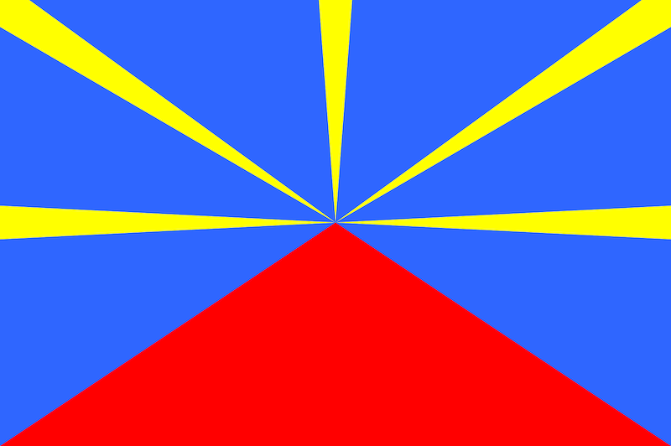

In [1]:
from IPython.display import Image
Image('bandeira.png')

Quais variáveis indicariam? Talvez algumas das cores sejam bons indicadores. A presença ou ausência de certas formas pode dar uma dica. Neste projeto, usaremos árvores de decisão para tentar prever o continente de bandeiras com base em vários desses recursos.

O conjunto de dados original está disponível no repositório de aprendizado de máquina UCI:

https://archive.ics.uci.edu/ml/datasets/Flags

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
cols = ['nome','continente','zone', 'area', 'população', 'idioma','religião','barras','listras','cores',
'vermelho','verde','azul','dourado','branco','preto','laranja','cor_predominante','círculos',
'cruzamentos','cruzes','quarters','sol_estrelas','crescent','triangle','icon','animate','text','topleft','botright']

df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

O conjunto de dados foi carregado e salvo em um dataframe chamado df. Alguns dos recursos de entrada e saída de interesse são:

- `nome`: Nome do país em questão.
- `continente` : 1=América do Norte, 2=América do Sul, 3=Europa, 4=África, 5=Ásia, 6=Oceania
- `barras`: Número de barras verticais na bandeira
- `listras` : Número de listras horizontais na bandeira
- `cores` : Número de cores diferentes na bandeira
- `vermelho` : 0 se vermelho ausente, 1 se vermelho presente na bandeira
...
- `cor_predominante` :  cor predominante na bandeira
- `círculos` : número de círculos na bandeira
- `cruzamentos` : Número de cruzamentos (na vertical)
- `cruzes` : número de cruzes diagonais
- `sol_estrelas` : Número de símbolos de sol ou estrela

**1.** Construiremos um classificador de árvore de decisão para prever de que continente vem uma determinada bandeira. Antes disso, queremos entender a distribuição das bandeiras por continente. Calcule a quantidade de países por  continente.

In [4]:

def transform_continent_name(idx):
    continent_name = {'1': 'América do Norte', '2': 'América do Sul', '3': 'Europa', '4': 'África', '5': 'Ásia', '6': 'Oceania'}
    return continent_name[str(idx)]

df['nome_continente'] = df['continente'].apply(lambda row: transform_continent_name(row))
groups = df.groupby(['nome_continente'])['nome_continente'].count()
df.drop('nome_continente', axis=1)
groups

nome_continente
América do Norte    31
América do Sul      17
Europa              35
Oceania             20
África              52
Ásia                39
Name: nome_continente, dtype: int64

**2.** Em vez de olhar para todos os seis continentes, vamos nos concentrar em apenas dois, Europa e Oceania. Crie um novo dataframe apenas com bandeiras da Europa e Oceania.

In [5]:
df_eu_oce = df[df.apply(lambda x: x['continente'] == 3 or x['continente'] == 6, axis=1)]
df_eu_oce

,nome,continente,zone,area,população,idioma,religião,barras,listras,cores,...,quarters,sol_estrelas,crescent,triangle,icon,animate,text,topleft,botright,nome_continente
1,Albania,3,1,29,3,6,6,0,0,3,...,0,1,0,0,0,1,0,red,red,Europa
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,1,1,1,0,blue,red,Oceania
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,blue,red,Europa
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,6,0,0,0,0,0,white,blue,Oceania
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,red,red,Europa
16,Belgium,3,1,31,10,6,0,3,0,3,...,0,0,0,0,0,0,0,black,red,Europa
26,Bulgaria,3,1,111,9,5,6,0,3,5,...,0,1,0,0,1,1,0,white,red,Europa
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,15,0,0,0,0,0,white,blue,Oceania
44,Cyprus,3,1,9,1,6,1,0,0,3,...,0,0,0,0,1,1,0,white,white,Europa
45,Czechoslovakia,3,1,128,15,5,6,0,0,3,...,0,0,0,1,0,0,0,white,red,Europa


**3.** Não usaremos todos os recursos disponíveis pois não são relevantes para classificação e/ou deixariam a árvore de decisão com muito profundidade. Crie um novo dataframe, chamado `x`, com somente as seguintes variáveis preditoras:

- `barras`
- `listras`
- `vermelho`
- `verde`
- `azul`
- `dourado`
- `branco`
- `preto`
- `laranja`
- `cor_predominante`
- `círculos`
- `cruzamentos`
- `cruzes`
- `quarters`
- `sol_estrelas`
- `triangle`
- `animate`

In [6]:
x = df_eu_oce[['barras', 'listras', 'vermelho', 'verde', 'azul', 'dourado', 'branco', 'preto', 'laranja', 'cor_predominante', 'círculos', 'cruzamentos', 'cruzes', 'quarters', 'sol_estrelas', 'triangle', 'animate']]

**4.** Construiremos um classificador para distinguir bandeiras para esses dois continentes – mas primeiro, imprima os tipos de dados das variáveis preditoras.

In [7]:
x.dtypes

barras               int64
listras              int64
vermelho             int64
verde                int64
azul                 int64
dourado              int64
branco               int64
preto                int64
laranja              int64
cor_predominante    object
círculos             int64
cruzamentos          int64
cruzes               int64
quarters             int64
sol_estrelas         int64
triangle             int64
animate              int64
dtype: object

**5.** Observe que todas as variáveis de previsão são numéricas, exceto `cor_predominante`. Transforme o conjunto de dados de variáveis preditoras em variáveis fictícias usando a função do pandas `get_dummies`.

In [8]:
cor_predominante = pd.get_dummies(df_eu_oce['cor_predominante'], drop_first=True)
x = x.merge(cor_predominante, left_index=True, right_index=True)
x = x.drop(columns=['cor_predominante'])
x

,barras,listras,vermelho,verde,azul,dourado,branco,preto,laranja,círculos,...,cruzes,quarters,sol_estrelas,triangle,animate,blue,gold,green,red,white
1,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,0,1,1,1,0,1,0,...,0,0,0,1,1,1,0,0,0,0
4,3,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,0,0,1,0,1,0,1,0,0,0,...,1,1,6,0,0,1,0,0,0,0
11,0,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,3,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26,0,3,1,1,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
41,0,0,1,0,1,0,1,0,0,1,...,1,1,15,0,0,1,0,0,0,0
44,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


**6.** Armazene os dados do atributo de saída na variável `y` 

In [9]:
y = df_eu_oce[['continente']]

**7.** Divida os dados em conjuntos de treino e teste.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

### Ajustar classificadores de árvore de decisão por profundidade

**8.** Ajuste o modelo de árvore de decisão testando o desempenho em uma faixa de valores de profundidade máxima. Ajuste um classificador de árvore de decisão para valores de `max_depth` de 1 a 20. Salve a pontuação de acurácia para cada profundidade na lista `profundidade`

In [11]:
data = []

for i in range(1, 21):
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    decision_tree.fit(x_train, y_train)
    score = decision_tree.score(x_test, y_test)
    data.append({'x': i, 'score': score})

data

[{'x': 1, 'score': 0.8235294117647058},
 {'x': 2, 'score': 0.8235294117647058},
 {'x': 3, 'score': 0.8235294117647058},
 {'x': 4, 'score': 0.8235294117647058},
 {'x': 5, 'score': 0.8235294117647058},
 {'x': 6, 'score': 0.8235294117647058},
 {'x': 7, 'score': 0.8235294117647058},
 {'x': 8, 'score': 0.8235294117647058},
 {'x': 9, 'score': 0.7647058823529411},
 {'x': 10, 'score': 0.7647058823529411},
 {'x': 11, 'score': 0.7647058823529411},
 {'x': 12, 'score': 0.7647058823529411},
 {'x': 13, 'score': 0.7058823529411765},
 {'x': 14, 'score': 0.7647058823529411},
 {'x': 15, 'score': 0.7647058823529411},
 {'x': 16, 'score': 0.6470588235294118},
 {'x': 17, 'score': 0.7647058823529411},
 {'x': 18, 'score': 0.7647058823529411},
 {'x': 19, 'score': 0.7058823529411765},
 {'x': 20, 'score': 0.7647058823529411}]

**9.** Plote a acurácia dos modelos de árvore de decisão versus o `max_depth`.

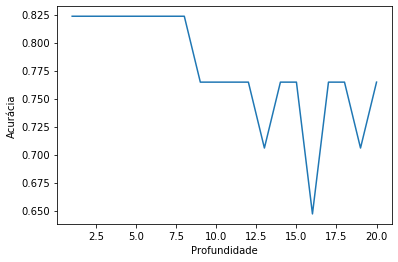

In [12]:

import numpy as np
import matplotlib.pyplot as plt

predict = list(map(lambda k: k['score'], data))
plt.plot(np.arange(1, 21), predict)
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')
plt.show();

**10.** Imprima a acurácia e profundidade do modelo com a maior precisão.

In [13]:
best_depth_value = 5;
decision_tree_classifier = DecisionTreeClassifier(max_depth=best_depth_value)
decision_tree_classifier.fit(x_train, y_train)
decision_tree_classifier.score(x_test, y_test)

0.8235294117647058

**11.** Reajuste o modelo de árvore de decisão usando o `max_depth` que obteve a maior acurácia; Mostre a árvore de decisão resultante.

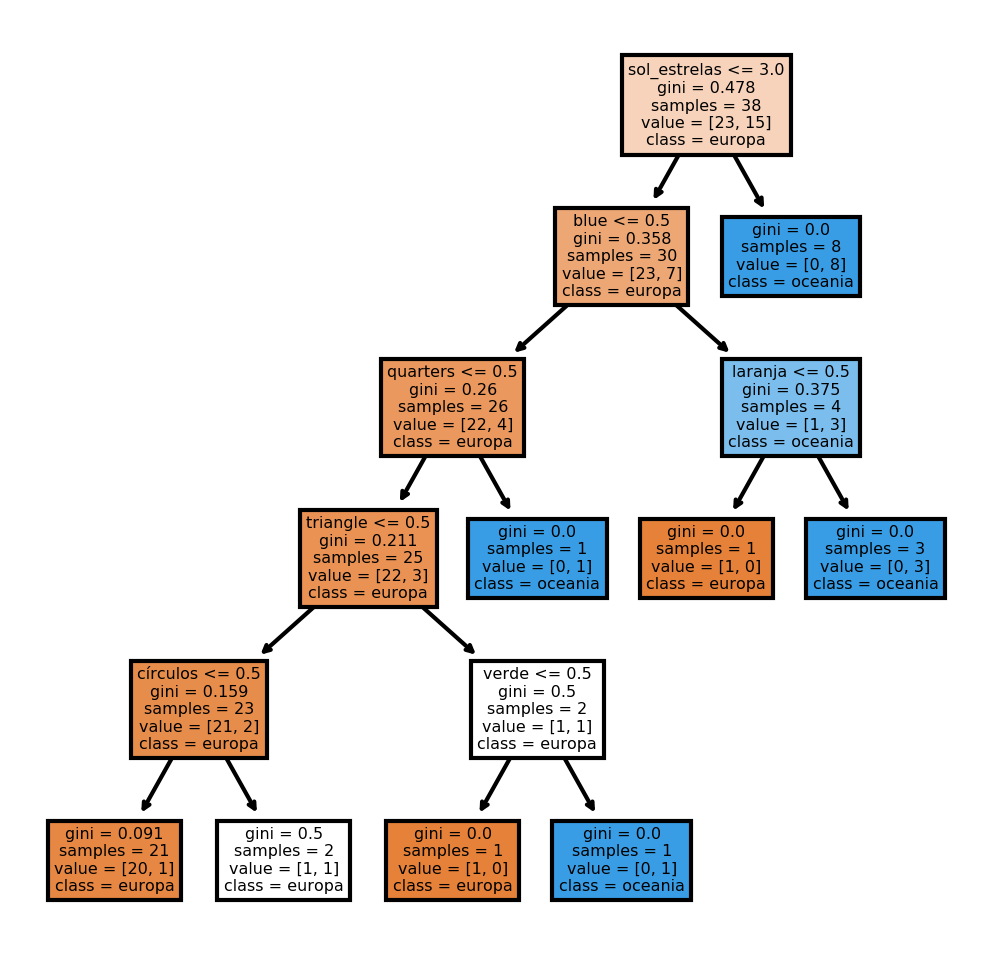

In [14]:
plt.subplots(figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_classifier, feature_names = x.columns,  class_names=['europa', 'oceania'], filled = True);

**12.** Existem algumas maneiras diferentes de estender este projeto. Tente classificar outra coisa! Por exemplo, em vez de prever o `continente`, poderia prever algo como o `idioma`.

Ajuste mais parâmetros do modelo. Você pode encontrar uma descrição de todos os parâmetros que podem ser ajustados na [documentação do Classificador de Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Por exemplo, veja o que acontece se você ajustar o `max_leaf_nodes`. Pense se você estaria superajustando ou subajustando os dados com base em quantos nós folha você permite.

**Aprimoração**: Adicionando duas novas colunas 'icon' e 'text' para testar os resultados e 'max_leaf_nodes' igual a 10

In [15]:
icon_df = df_eu_oce[['icon']]
text_df = df_eu_oce[['text']]
x = pd.concat([x, icon_df, text_df], axis=1)
x.columns

Index(['barras', 'listras', 'vermelho', 'verde', 'azul', 'dourado', 'branco',
       'preto', 'laranja', 'círculos', 'cruzamentos', 'cruzes', 'quarters',
       'sol_estrelas', 'triangle', 'animate', 'blue', 'gold', 'green', 'red',
       'white', 'icon', 'text'],
      dtype='object')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

data = []

for i in range(1, 21):
    decision_tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    decision_tree.fit(x_train, y_train)
    score = decision_tree.score(x_test, y_test)
    data.append({'x': i, 'score': score})

data

[{'x': 1, 'score': 0.8235294117647058},
 {'x': 2, 'score': 0.8235294117647058},
 {'x': 3, 'score': 0.8235294117647058},
 {'x': 4, 'score': 0.8235294117647058},
 {'x': 5, 'score': 0.8235294117647058},
 {'x': 6, 'score': 0.8235294117647058},
 {'x': 7, 'score': 0.7647058823529411},
 {'x': 8, 'score': 0.6470588235294118},
 {'x': 9, 'score': 0.6470588235294118},
 {'x': 10, 'score': 0.6470588235294118},
 {'x': 11, 'score': 0.6470588235294118},
 {'x': 12, 'score': 0.6470588235294118},
 {'x': 13, 'score': 0.6470588235294118},
 {'x': 14, 'score': 0.6470588235294118},
 {'x': 15, 'score': 0.6470588235294118},
 {'x': 16, 'score': 0.6470588235294118},
 {'x': 17, 'score': 0.6470588235294118},
 {'x': 18, 'score': 0.6470588235294118},
 {'x': 19, 'score': 0.6470588235294118},
 {'x': 20, 'score': 0.6470588235294118}]

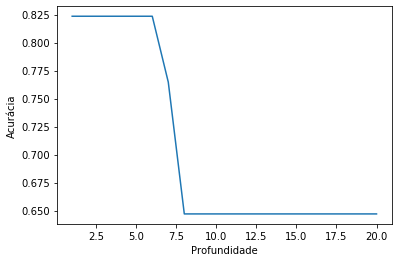

In [17]:
predict = list(map(lambda k: k['score'], data))
plt.plot(np.arange(1, 21), predict)
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')
plt.show();

In [18]:
best_depth_value = 6;
decision_tree_classifier = DecisionTreeClassifier(max_depth=best_depth_value, random_state=0)
decision_tree_classifier.fit(x_train, y_train)
decision_tree_classifier.score(x_test, y_test)

0.8235294117647058

**R**: Obteve-se o mesmo resultado